# Cat images

In [1]:
import pandas as pd

In [2]:
iss = [0, 2, 3]

dfs = [pd.read_csv(f'./data/splitnet_lsuv_sweep_{i}.csv') for i in iss]

In [4]:
dfs[0]['last_psnr']

0      11.711128
1      11.640606
2      11.597815
3      11.536552
4      11.515860
         ...    
495     9.531096
496     9.530393
497     9.528605
498     9.526772
499     9.525840
Name: last_psnr, Length: 500, dtype: float64

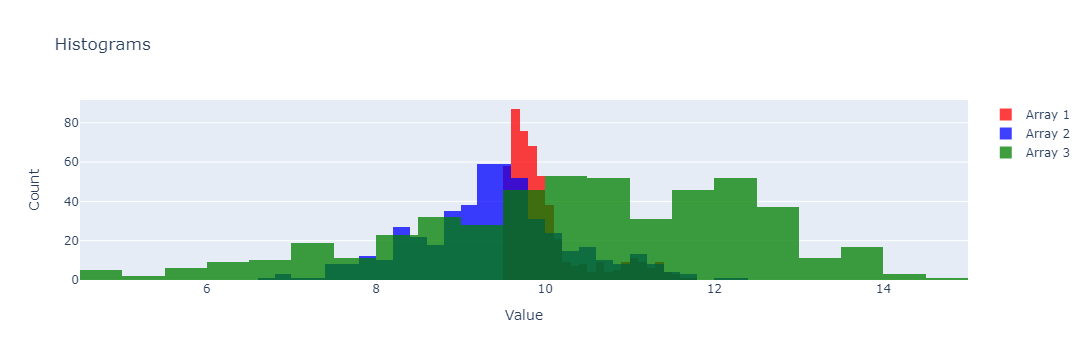

In [6]:
import plotly.graph_objects as go


data = []

arrays = [df['last_psnr'] for df in dfs] # Add as many arrays as you want
colors = ['red', 'blue', 'green'] # Add as many colors as you have arrays

for i, array in enumerate(arrays):
    trace = go.Histogram(
        x=array,
        opacity=0.75,
        name=f'Array {i+1}',
        marker=dict(color=colors[i])
    )
    data.append(trace)

layout = go.Layout(barmode='overlay', title_text='Histograms', xaxis=dict(title='Value'), yaxis=dict(title='Count'))
fig = go.Figure(data=data, layout=layout)

# Render the plot
fig.show()


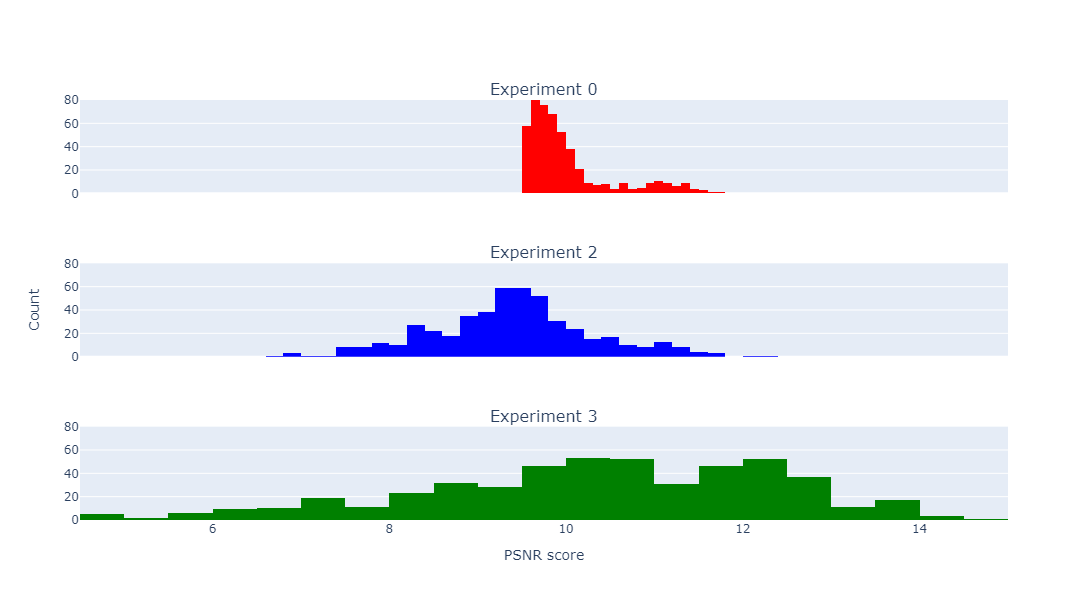

In [20]:
import plotly.subplots as sp
import plotly.graph_objects as go

# Assume these are your arrays
array1, array2, array3 = arrays

# Create the subplots
fig = sp.make_subplots(rows=3, cols=1, shared_xaxes=True, subplot_titles=("Experiment 0", "Experiment 2", "Experiment 3"))

# Create a histogram for each array
trace1 = go.Histogram(x=array1, marker=dict(color='red'), name='Sweep 0')
trace2 = go.Histogram(x=array2, marker=dict(color='blue'), name='Sweep 2')
trace3 = go.Histogram(x=array3, marker=dict(color='green'), name='Sweep 3')

# Add the histograms to the subplots
fig.add_trace(trace1, row=1, col=1)
fig.add_trace(trace2, row=2, col=1)
fig.add_trace(trace3, row=3, col=1)


# Label x-axis and y-axis
fig.update_layout(
    height=600, 
    width=1200,
                  xaxis3_title='PSNR score',
                  yaxis2_title='Count',
                  # title_text='Histograms for Different Arrays',
                  showlegend=False
                 )

fig.update_yaxes(range=[0, 80]) # Adjust this range according to your data

# Display the figure
fig.show()


# sweep

In [1]:
import pandas as pd

In [7]:
df = pd.read_csv('./data/siren_sweep__wandb_export_2023-05-20T14_54_56.212+03_00.csv')
df = df[~df['last_psnr'].isna()]
df

Name   last_psnr     Agent     State Notes         User  \
0      cosmic-sweep-17  116.582748  sf1vjcdr  finished     -  kilianovski   
1     valiant-sweep-62  107.318336  u9vx7m5x  finished     -  kilianovski   
2       major-sweep-99  104.996964  u9vx7m5x  finished     -  kilianovski   
3    stilted-sweep-100   96.849220  u9vx7m5x  finished     -  kilianovski   
4      astral-sweep-94   96.637810  u9vx7m5x  finished     -  kilianovski   
..                 ...         ...       ...       ...   ...          ...   
120   earnest-sweep-78   26.137774  u9vx7m5x  finished     -  kilianovski   
121  faithful-sweep-65   25.935354  u9vx7m5x  finished     -  kilianovski   
122    autumn-sweep-93   24.462254  u9vx7m5x  finished     -  kilianovski   
123   driven-sweep-112   22.958290  u9vx7m5x  finished     -  kilianovski   
124   fallen-sweep-114   17.095772  u9vx7m5x  finished     -  kilianovski   

     Tags                   Created  Runtime     Sweep      flic      initc  \
0     NaN  2023-05-13T09:25:09.000Z       39  pfedvrix  1.933903  39.437899   
1     NaN  2023-05-13T09:51:10.000Z       30  pfedvrix  2.490884  36.977081   
2     NaN  2023-05-13T10:19:29.000Z       29  pfedvrix  7.068470  21.494923   
3     NaN  2023-05-13T10:20:00.000Z       32  pfedvrix  8.087628  18.302006   
4     NaN  2023-05-13T10:09:26.000Z       31  pfedvrix  3.611356  47.862278   
..    ...                       ...      ...       ...       ...        ...   
120   NaN  2023-05-13T10:00:32.000Z       29  pfedvrix  0.282800  30.359212   
121   NaN  2023-05-13T09:52:58.000Z       37  pfedvrix  0.210020  45.840157   
122   NaN  2023-05-13T10:08:50.000Z       32  pfedvrix  0.147982  59.697887   
123   NaN  2023-05-13T10:26:56.000Z       32  pfedvrix  0.200794  28.862950   
124   NaN  2023-05-13T10:28:02.000Z       31  pfedvrix  0.023818  95.247770   

          mse.min    psnr.max   step  total_params  
0    2.063470e-12  116.854019  299.0           NaN  
1             NaN         NaN    NaN           NaN  
2             NaN         NaN    NaN           NaN  
3             NaN         NaN    NaN           NaN  
4             NaN         NaN    NaN           NaN  
..            ...         ...    ...           ...  
120           NaN         NaN    NaN           NaN  
121           NaN         NaN    NaN           NaN  
122           NaN         NaN    NaN           NaN  
123           NaN         NaN    NaN           NaN  
124           NaN         NaN    NaN           NaN  

[125 rows x 16 columns]

In [10]:
df_vis = pd.concat([df.head(), df.tail()])[['last_psnr', 'flic', 'initc']]
df_vis

last_psnr      flic      initc
0    116.582748  1.933903  39.437899
1    107.318336  2.490884  36.977081
2    104.996964  7.068470  21.494923
3     96.849220  8.087628  18.302006
4     96.637810  3.611356  47.862278
120   26.137774  0.282800  30.359212
121   25.935354  0.210020  45.840157
122   24.462254  0.147982  59.697887
123   22.958290  0.200794  28.862950
124   17.095772  0.023818  95.247770

In [13]:
print(df_vis.to_latex(index=False, float_format='%.2f'))

\begin{tabular}{rrr}
\toprule
 last\_psnr &  flic &  initc \\
\midrule
    116.58 &  1.93 &  39.44 \\
    107.32 &  2.49 &  36.98 \\
    105.00 &  7.07 &  21.49 \\
     96.85 &  8.09 &  18.30 \\
     96.64 &  3.61 &  47.86 \\
     26.14 &  0.28 &  30.36 \\
     25.94 &  0.21 &  45.84 \\
     24.46 &  0.15 &  59.70 \\
     22.96 &  0.20 &  28.86 \\
     17.10 &  0.02 &  95.25 \\
\bottomrule
\end{tabular}



# Multiple networks

In [1]:
import pandas as pd

In [2]:
df_path = './data/wandb_export_2023-05-19T21_16_49.608+03_00.csv'

In [3]:
import re

def clean_cname(s):
    initc = re.search(r'initc=([0-9]*\.?[0-9]+)', s)
    flic = re.search(r'flic=([0-9]*\.?[0-9]+)', s)
    
    is_min = '__MIN' in s
    is_max = '__MAX' in s
    
    is_last = not (is_min or is_max)

    suffix = '__MIN' if is_min  else ('__MAX' if is_max else ('__LAST' if is_last else 'ERROR'))
        
    if initc and flic:
        return s.replace('siren_init__', '').replace('- psnr', '').replace('Group:','').strip()
        return f'initc={initc.group(1)}__flic={flic.group(1)}' + suffix
    else:
        return None

In [4]:
def read_df(df_path):
    df = pd.read_csv(df_path)
    df = df.set_index('Step')
    display ( df.head() )
    df.columns = [clean_cname(c) for c in df.columns]
    df = df[[c for c in df.columns if '__MIN' not in c and '__MAX' not in c]]
    return df


df = read_df(df_path)

Group: siren_init__initc=40.0__flic=2.0__nh=3__h=1024 - psnr  \
Step                                                                 
1                                              3.405772              
3                                              4.498049              
4                                              5.202569              
5                                              5.799910              
6                                              6.380302              

      Group: siren_init__initc=40.0__flic=2.0__nh=3__h=1024 - psnr__MIN  \
Step                                                                      
1                                              3.250797                   
3                                              4.313480                   
4                                              4.998116                   
5                                              5.579941                   
6                                              6.142166                   

      Group: siren_init__initc=40.0__flic=2.0__nh=3__h=1024 - psnr__MAX  \
Step                                                                      
1                                              3.560748                   
3                                              4.682619                   
4                                              5.407022                   
5                                              6.019878                   
6                                              6.618438                   

      Group: siren_init__initc=40.0__flic=2.0__nh=3__h=512 - psnr  \
Step                                                                
1                                              3.368584             
3                                              3.865329             
4                                              4.225373             
5                                              4.505709             
6                                              4.754953             

      Group: siren_init__initc=40.0__flic=2.0__nh=3__h=512 - psnr__MIN  \
Step                                                                     
1                                              3.297370                  
3                                              3.803490                  
4                                              4.168347                  
5                                              4.451525                  
6                                              4.702703                  

      Group: siren_init__initc=40.0__flic=2.0__nh=3__h=512 - psnr__MAX  \
Step                                                                     
1                                              3.439798                  
3                                              3.927167                  
4                                              4.282400                  
5                                              4.559893                  
6                                              4.807203                  

      Group: siren_init__initc=6__flic=1__nh=3__h=1024__baseline - psnr  \
Step                                                                      
1                                              3.599829                   
3                                              8.886781                   
4                                             12.102693                   
5                                             12.513226                   
6                                             12.923251                   

      Group: siren_init__initc=6__flic=1__nh=3__h=1024__baseline - psnr__MIN  \
Step                                                                           
1                                              3.383247                        
3                                              8.794443                        
4                                             11.933050                        
5              

In [5]:
df.max()

initc=40.0__flic=2.0__nh=3__h=1024         108.911648
initc=40.0__flic=2.0__nh=3__h=512           45.548832
initc=6__flic=1__nh=3__h=1024__baseline     40.236055
initc=6__flic=1__nh=3__h=512__baseline      30.978189
initc=40.0__flic=2.0__nh=3__h=256           27.121355
initc=6__flic=1__nh=3__h=256__baseline      24.829891
initc=6__flic=1__nh=3__h=128__baseline      21.716475
initc=40.0__flic=2.0__nh=3__h=128           21.625510
dtype: float64

In [6]:
vis_df = df.iloc[-1].to_frame()
vis_df['Number of parameters'] = 32
vis_df = vis_df.sort_index()
vis_df

3006  Number of parameters
initc=40.0__flic=2.0__nh=3__h=1024       46.229961                    32
initc=40.0__flic=2.0__nh=3__h=128        21.625510                    32
initc=40.0__flic=2.0__nh=3__h=256        27.113833                    32
initc=40.0__flic=2.0__nh=3__h=512        43.575623                    32
initc=6__flic=1__nh=3__h=1024__baseline  34.372648                    32
initc=6__flic=1__nh=3__h=128__baseline   21.716475                    32
initc=6__flic=1__nh=3__h=256__baseline   24.829613                    32
initc=6__flic=1__nh=3__h=512__baseline   30.667396                    32

In [7]:
print(vis_df.to_latex())

\begin{tabular}{lrr}
\toprule
{} &       3006 &  Number of parameters \\
\midrule
initc=40.0\_\_flic=2.0\_\_nh=3\_\_h=1024      &  46.229961 &                    32 \\
initc=40.0\_\_flic=2.0\_\_nh=3\_\_h=128       &  21.625510 &                    32 \\
initc=40.0\_\_flic=2.0\_\_nh=3\_\_h=256       &  27.113833 &                    32 \\
initc=40.0\_\_flic=2.0\_\_nh=3\_\_h=512       &  43.575623 &                    32 \\
initc=6\_\_flic=1\_\_nh=3\_\_h=1024\_\_baseline &  34.372648 &                    32 \\
initc=6\_\_flic=1\_\_nh=3\_\_h=128\_\_baseline  &  21.716475 &                    32 \\
initc=6\_\_flic=1\_\_nh=3\_\_h=256\_\_baseline  &  24.829613 &                    32 \\
initc=6\_\_flic=1\_\_nh=3\_\_h=512\_\_baseline  &  30.667396 &                    32 \\
\bottomrule
\end{tabular}



## Plot

In [8]:
df = read_df(df_path)
df

Group: siren_init__initc=40.0__flic=2.0__nh=3__h=1024 - psnr  \
Step                                                                 
1                                              3.405772              
3                                              4.498049              
4                                              5.202569              
5                                              5.799910              
6                                              6.380302              

      Group: siren_init__initc=40.0__flic=2.0__nh=3__h=1024 - psnr__MIN  \
Step                                                                      
1                                              3.250797                   
3                                              4.313480                   
4                                              4.998116                   
5                                              5.579941                   
6                                              6.142166                   

      Group: siren_init__initc=40.0__flic=2.0__nh=3__h=1024 - psnr__MAX  \
Step                                                                      
1                                              3.560748                   
3                                              4.682619                   
4                                              5.407022                   
5                                              6.019878                   
6                                              6.618438                   

      Group: siren_init__initc=40.0__flic=2.0__nh=3__h=512 - psnr  \
Step                                                                
1                                              3.368584             
3                                              3.865329             
4                                              4.225373             
5                                              4.505709             
6                                              4.754953             

      Group: siren_init__initc=40.0__flic=2.0__nh=3__h=512 - psnr__MIN  \
Step                                                                     
1                                              3.297370                  
3                                              3.803490                  
4                                              4.168347                  
5                                              4.451525                  
6                                              4.702703                  

      Group: siren_init__initc=40.0__flic=2.0__nh=3__h=512 - psnr__MAX  \
Step                                                                     
1                                              3.439798                  
3                                              3.927167                  
4                                              4.282400                  
5                                              4.559893                  
6                                              4.807203                  

      Group: siren_init__initc=6__flic=1__nh=3__h=1024__baseline - psnr  \
Step                                                                      
1                                              3.599829                   
3                                              8.886781                   
4                                             12.102693                   
5                                             12.513226                   
6                                             12.923251                   

      Group: siren_init__initc=6__flic=1__nh=3__h=1024__baseline - psnr__MIN  \
Step                                                                           
1                                              3.383247                        
3                                              8.794443                        
4                                             11.933050                        
5              

initc=40.0__flic=2.0__nh=3__h=1024  initc=40.0__flic=2.0__nh=3__h=512  \
Step                                                                          
1                               3.405772                           3.368584   
3                               4.498049                           3.865329   
4                               5.202569                           4.225373   
5                               5.799910                           4.505709   
6                               6.380302                           4.754953   
...                                  ...                                ...   
3002                           45.988871                          43.316490   
3003                           46.015985                          43.371592   
3004                           46.068661                          43.386389   
3005                           46.093140                          43.481262   
3006                           46.229961                          43.575623   

      initc=6__flic=1__nh=3__h=1024__baseline  \
Step                                            
1                                    3.599829   
3                                    8.886781   
4                                   12.102693   
5                                   12.513226   
6                                   12.923251   
...                                       ...   
3002                                34.188194   
3003                                34.027016   
3004                                33.967726   
3005                                33.917073   
3006                                34.372648   

      initc=6__flic=1__nh=3__h=512__baseline  \
Step                                           
1                                   3.467496   
3                                   6.479186   
4                                   8.510740   
5                                   9.634982   
6                                  10.395121   
...                                      ...   
3002                               30.792203   
3003                               30.755247   
3004                               30.712360   
3005                               30.670313   
3006                               30.667396   

      initc=40.0__flic=2.0__nh=3__h=256  \
Step                                      
1                              3.239813   
3                              3.436458   
4                              3.606090   
5                              3.747378   
6                              3.868277   
...                                 ...   
3002                          27.114473   
3003                          27.114436   
3004                          27.114327   
3005                          27.114120   
3006                          27.113833   

      initc=6__flic=1__nh=3__h=256__baseline  \
Step                                           
1                                   3.302814   
3                                   4.714726   
4                                   5.802330   
5                                   6.679679   
6                                   7.372632   
...                                      ...   
3002                               24.816194   
3003                               24.813167   
3004                               24.818581   
3005                               24.822133   
3006                               24.829613   

      initc=6__flic=1__nh=3__h=128__baseline  \
Step                                           
1                                   3.159651   
3                                   3.752631   
4                                   4.311813   
5                                   4.804782   
6                                   5.225634   
...                                      ...   
3002                               21.707694   
3003                               21.710575   
3004                               21.713320   
30

In [9]:
df.columns

Index(['initc=40.0__flic=2.0__nh=3__h=1024',
       'initc=40.0__flic=2.0__nh=3__h=512',
       'initc=6__flic=1__nh=3__h=1024__baseline',
       'initc=6__flic=1__nh=3__h=512__baseline',
       'initc=40.0__flic=2.0__nh=3__h=256',
       'initc=6__flic=1__nh=3__h=256__baseline',
       'initc=6__flic=1__nh=3__h=128__baseline',
       'initc=40.0__flic=2.0__nh=3__h=128'],
      dtype='object')

In [10]:
cols = [
    ['initc=40.0__flic=2.0__nh=3__h=128', 'initc=6__flic=1__nh=3__h=128__baseline'],
    ['initc=40.0__flic=2.0__nh=3__h=256', 'initc=6__flic=1__nh=3__h=256__baseline'],
    ['initc=40.0__flic=2.0__nh=3__h=512', 'initc=6__flic=1__nh=3__h=512__baseline'],
    ['initc=40.0__flic=2.0__nh=3__h=1024', 'initc=6__flic=1__nh=3__h=1024__baseline'],
]
df[cols[-1]]

initc=40.0__flic=2.0__nh=3__h=1024  \
Step                                       
1                               3.405772   
3                               4.498049   
4                               5.202569   
5                               5.799910   
6                               6.380302   
...                                  ...   
3002                           45.988871   
3003                           46.015985   
3004                           46.068661   
3005                           46.093140   
3006                           46.229961   

      initc=6__flic=1__nh=3__h=1024__baseline  
Step                                           
1                                    3.599829  
3                                    8.886781  
4                                   12.102693  
5                                   12.513226  
6                                   12.923251  
...                                       ...  
3002                                34.188194  
3003                                34.027016  
3004                                33.967726  
3005                                33.917073  
3006                                34.372648  

[3000 rows x 2 columns]

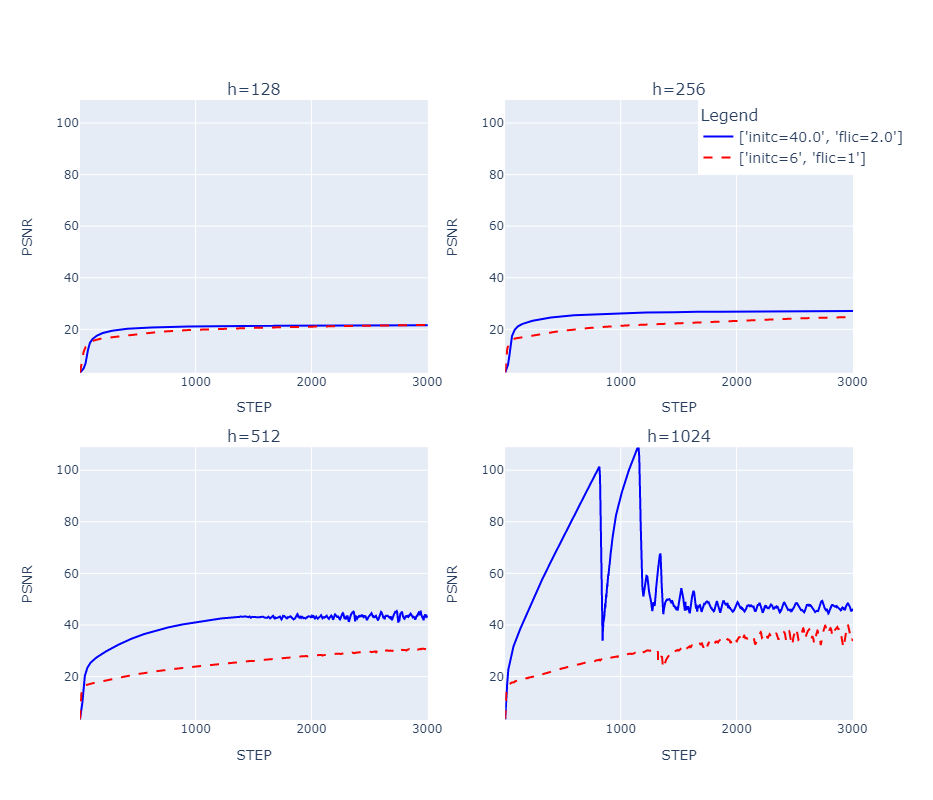

In [11]:
import plotly.subplots as sp
import plotly.graph_objects as go

# Create 2x2 subplot layout
subplot_titles = [f'h={h}' for h in [128, 256, 512, 1024]]
fig = sp.make_subplots(rows=2, cols=2, subplot_titles=subplot_titles, vertical_spacing=0.12)

# Let's first find out the overall y range.
y_min = min(df[cols[0][0]].min(), df[cols[0][1]].min(), df[cols[1][0]].min(), df[cols[1][1]].min(),
            df[cols[2][0]].min(), df[cols[2][1]].min(), df[cols[3][0]].min(), df[cols[3][1]].min())
y_max = max(df[cols[0][0]].max(), df[cols[0][1]].max(), df[cols[1][0]].max(), df[cols[1][1]].max(),
            df[cols[2][0]].max(), df[cols[2][1]].max(), df[cols[3][0]].max(), df[cols[3][1]].max())

# Add traces for each subplot
for i, pair in enumerate(cols):
    row = i // 2 + 1
    col = i % 2 + 1
    showlegend = True if i==0 else False  # show legend only for the first subplot
    fig.add_trace(go.Scatter(x=df.index, y=df[pair[0]], mode='lines', 
                             name=str(pair[0].split('__')[:2]), 
                             line=dict(color='blue'),
                             showlegend=showlegend), 
                  row=row, col=col)
    fig.add_trace(go.Scatter(x=df.index, y=df[pair[1]], mode='lines', 
                             name=str(pair[1].split('__')[:2]), 
                             line=dict(color='red', dash='dash'),
                             showlegend=showlegend), 
                  row=row, col=col)
    
        # Update x and y axis titles for each subplot
    fig.update_xaxes(title_text='STEP', row=row, col=col)
    fig.update_yaxes(title_text='PSNR', row=row, col=col)


# Update yaxis properties
fig.update_yaxes(range=[y_min, y_max])
    
# Update layout
fig.update_layout(height=800, width=1200, title_text=None, 
                  legend_title_text='Legend',
                 xaxis_title='STEP',
                  yaxis_title='PSNR',
                                   title_font=dict(size=28),
                  legend=dict(x=0.8, y=1., # move legend to top-right corner
                              title_text='Legend',
                              title_font=dict(size=16),
                              font=dict(size=14)))

fig.show()


In [12]:
df = pd.read_csv('./data/initc=40.0__flic=2.0__nh=3__h=1024__rs[0,1]wandb_export_2023-05-20T10_53_24.866+03_00.csv')
df = df.set_index('Step')

# cols1024 = [c for c in df.columns if 'h=1024' in c]
# df = df[cols1024]

# df.columns = [clean_cname(c) for c in df.columns]
# df = df[[c for c in df.columns if '__MIN' not in c and '__MAX' not in c]]

pair = ['rs0 - psnr', 'rs1 - psnr']
df[pair]

rs0 - psnr  rs1 - psnr
Step                        
1       3.250797    3.560748
3       4.313480    4.682619
4       4.998116    5.407022
5       5.579941    6.019878
6       6.142166    6.618438
...          ...         ...
3002   45.583794   46.393948
3003   45.405384   46.626587
3004   45.391235   46.746086
3005   45.170902   47.015377
3006   45.201717   47.258205

[3000 rows x 2 columns]

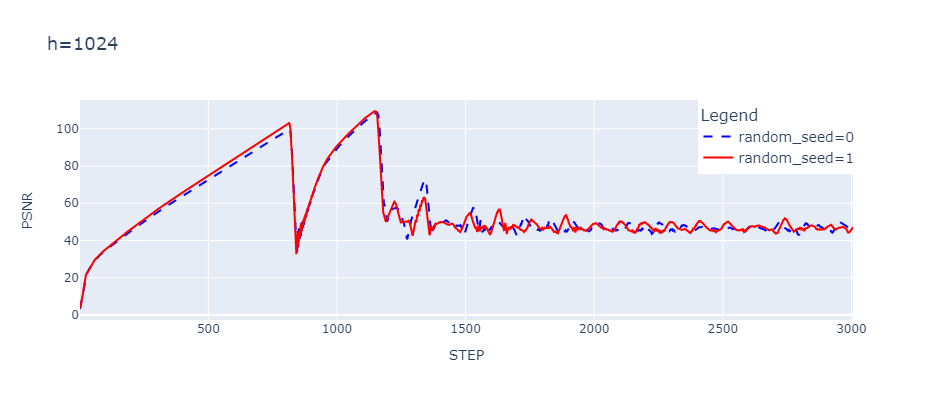

In [15]:
import plotly.graph_objects as go

# Create a single plot
fig = go.Figure()

# Add traces for the pair
fig.add_trace(go.Scatter(x=df.index, y=df[pair[0]], mode='lines', 
                         name='random_seed=0', 
                         line=dict(color='blue', dash='dash')))  # make the line dashed

fig.add_trace(go.Scatter(x=df.index, y=df[pair[1]], mode='lines', 
                         name='random_seed=1', 
                         line=dict(color='red')))

# Update layout
fig.update_layout(height=400, width=800, 
                  title_text='h=1024',
                  title_font=dict(size=18),
                  legend_title_font=dict(size=16),
                  legend_font=dict(size=14),
                  legend_title_text='Legend',
                 xaxis_title='STEP',
                  yaxis_title='PSNR',
                                    legend=dict(x=0.8, y=1., # move legend to top-right corner
                              title_text='Legend',
                              title_font=dict(size=16),
                              font=dict(size=14))
                 )

fig.show()


In [7]:
break

SyntaxError: 'break' outside loop (668683560.py, line 4)

# SIREN audio results

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
img_baseline = np.asarray(Image.open('./data/siren_audio_error__baseline.png'))
plt.imshow(img_baseline)

In [ ]:
img_my = np.asarray(Image.open('./data/siren_audio_error__myinit.png'))
plt.imshow(img_my)

In [ ]:
img = np.concatenate([img_baseline, img_my], axis=1)
img = Image.fromarray(img)
img

In [ ]:
img.save('./data/siren_audio_errors.png')

# Siren video results

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
img_baseline_pil = Image.open('./data/media_images_image_1505_6850878c61d27950f10e.png')
img_baseline_pil

In [ ]:
img_my_pil = Image.open('./data/media_images_image_1505_92b833b3c3381fe09e98.png')
img_my_pil

In [ ]:
h,w,c = np.asarray(img_my_pil).shape

In [ ]:
img = np.concatenate([np.asarray(img_baseline_pil), np.asarray(img_my_pil)[h//2:]], axis=0)
plt.imshow(img)

In [ ]:
Image.fromarray(img).save('./data/siren_init_comparision_video.png')

In [ ]:
import numpy as np
from PIL import Image, ImageDraw, ImageFont

# Load the image
image_path = './data/media_images_image_1505_6850878c61d27950f10e.png'  # Replace with your image path
image = Image.open(image_path)

# Convert the image to a numpy array
image_array = np.array(image)[..., :3]

# Create a white rectangle on the left side
rectangle_width = 100  # Adjust the width as desired
rectangle_color = (255, 255, 255)  # White color (RGB)
image_array[:, :rectangle_width, :] = rectangle_color

# Convert the numpy array back to an image
modified_image = Image.fromarray(image_array)

# Add vertical text
text = "Vertical Text"
font_path = 'Roboto-Bold.ttf'  # Replace with your font path
font_size = 20  # Adjust the font size as desired
text_color = (0, 0, 0)  # Black color (RGB)

font = ImageFont.truetype(font_path, font_size)
draw = ImageDraw.Draw(modified_image)

text_width, text_height = draw.textsize(text, font=font)
text_position = ((rectangle_width - text_height) // 2, (image.height - text_width) // 2)

# Rotate the text by 90 degrees
rotated_text = Image.new('RGBA', (text_width, text_height), (255, 255, 255, 0))
rotated_draw = ImageDraw.Draw(rotated_text)
rotated_draw.text((0, 0), text, font=font, fill=text_color)

rotated_text = rotated_text.rotate(90, expand=True)

modified_image.paste(ImageOps.colorize(rotated_text, (0, 0, 0), text_color), text_position, rotated_text)

# Display or save the modified image
modified_image.show()
# modified_image.save('path_to_save_image.jpg')  # Uncomment to save the image

In [ ]:
import numpy as np
from PIL import Image, ImageDraw, ImageFont

# Load the image
image_path = 'path_to_your_image.jpg'  # Replace with your image path
image = Image.open(image_path)

# Convert the image to a numpy array
image_array = np.array(image)

# Create a white rectangle on the left side
rectangle_width = 100  # Adjust the width as desired
rectangle_color = (255, 255, 255)  # White color (RGB)
image_array[:, :rectangle_width, :] = rectangle_color

# Convert the numpy array back to an image
modified_image = Image.fromarray(image_array)

# Add vertical text
text = "Vertical Text"

# Use a sample font (Arial)
font_path = 'arial.ttf'  # Replace with the path to your desired font file
font_size = 20  # Adjust the font size as desired
text_color = (0, 0, 0)  # Black color (RGB)

font = ImageFont.truetype(font_path, font_size)
draw = ImageDraw.Draw(modified_image)

text_width, text_height = draw.textsize(text, font=font)
text_position = ((rectangle_width - text_height) // 2, (image.height - text_width) // 2)

# Rotate the text by 90 degrees
rotated_text = Image.new('RGBA', (text_width, text_height), (255, 255, 255, 0))
rotated_draw = ImageDraw.Draw(rotated_text)
rotated_draw.text((0, 0), text, font=font, fill=text_color)

rotated_text = rotated_text.rotate(90, expand=True)

modified_image.paste(ImageOps.colorize(rotated_text, (0, 0, 0), text_color), text_position, rotated_text)

# Display or save the modified image
modified_image.show()
# modified_image.save('path_to_save_image.jpg')  # Uncomment to save the image


In [ ]:
modified_image